In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from perceptron import Perceptron
from util import *
from scores import Scores
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

In [3]:
%matplotlib inline
sns.set()

In [16]:
# obtendo o conjunto de imagens de números escritos
from sklearn.datasets import load_digits # versao 8x8
mnist = load_digits()

In [45]:
_N = int(mnist.data.shape[0]*0.85)
x_train, y_train = mnist.data[:_N], mnist.target[:_N].astype(np.uint8)
x_test, y_test = mnist.data[_N:], mnist.target[_N:].astype(np.uint8)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
normalizar(x_train)
normalizar(x_test)

y_loops = []
for y in y_train:
    if y[0] == 8:
        y_loops.append(2)
    elif y[0] in (0, 6, 9):
        y_loops.append(1)
    else:
        y_loops.append(0)
y_loops = np.array(y_loops).reshape(-1, 1)

In [67]:
print(y_train[136], y_loops[136])

[6] [1]


In [69]:
percep_loop = Perceptron(taxa=0.01, ativacao="elu")
percep_loop.treinar(x_train, y_loops, M=25)

[0 1 2]
Neurônios: [46]


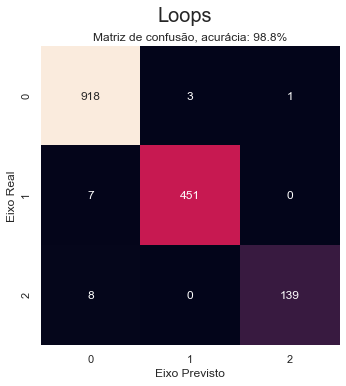

In [70]:
y_loops_pred = percep_loop.prever(x_train)
score = Scores(y_loops, y_loops_pred)
score.exibir_grafico("Loops")

In [23]:
perceptron = Perceptron(taxa=0.001, ativacao="l_relu", N=[48, 24], debug=1)
perceptron.N

[48, 24]

In [24]:
%%timeit -r 1 -n 1
perceptron.treinar(x_train, y_train, M=50)

Neurônios: [48, 24]



6min 26s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


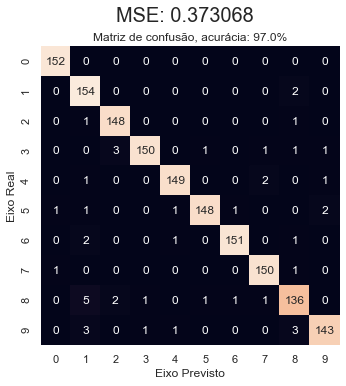

Wall time: 1.73 s


In [25]:
%%time
y_train_pred = perceptron.prever(x_train)
mse = perceptron.funcao_erro(x_train, y_train)
score = Scores(y_train, y_train_pred)
score.exibir_grafico("MSE: %f"%mse)

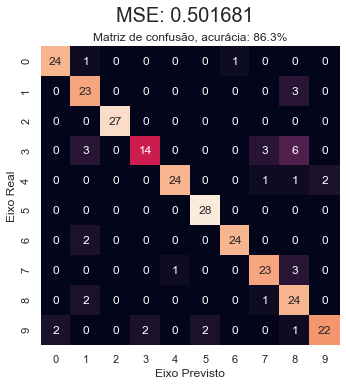

682 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [26]:
%%timeit -r 1 -n 1
y_pred = perceptron.prever(x_test)
mse = perceptron.funcao_erro(x_test, y_test)
score = Scores(y_test, y_pred)
score.exibir_grafico("MSE: %f"%mse)